# Python for Data Analysis and Visualization

---
<html>
<p>
<a href="https://tuftsdatalab.github.io/python-data-analysis/" target="_blank">
        <img src="https://tuftsdatalab.github.io/badges/workshop.svg" alt="Workshop Website" style="float: left;"/></a>
<span style="float:left;">&ensp;</span>
<a href="https://github.com/tuftsdatalab/python-data-analysis/" target="_blank">
        <img src="https://tuftsdatalab.github.io/badges/github.svg" alt="View on GitHub" style="float: left;"/></a>
<span style="float:left;">&ensp;</span>
<a href="https://sites.tufts.edu/datalab/" target="_blank">
        <img src="https://tuftsdatalab.github.io/badges/datalab.svg" alt="datalab.tufts.edu" style="float: left;"/></a>
<span style="float:left;">&ensp;</span>
<a href="https://twitter.com/intent/follow?screen_name=tuftsdatalab" target="_blank">
        <img src="https://tuftsdatalab.github.io/badges/twitter.svg" alt="@TuftsDataLab" style="float: left;"/></a>
<br>
</p>
</html>

**A Tufts University Data Lab Workshop**\
Written by Uku-Kaspar Uustalu

Python resources: [go.tufts.edu/python](https://sites.tufts.edu/datalab/python/)\
Questions: [datalab-support@elist.tufts.edu](mailto:datalab-support@elist.tufts.edu)\
Feedback: [uku-kaspar.uustalu@tufts.edu](mailto:uku-kaspar.uustalu@tufts.edu)

---

## Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Quick Overview of Matplotlib

Matplotlib works in a layered fashion. First you define your plot using `plt.plot(x, y, ...)`, then you can use additional `plt` methods to add more layers to your plot or modify its appearance. Finally, you use `plt.show()` to show the plot or `plt.savefig()` to save it to an external file. Let's see how Matplotlib works in practice by creating some trigonometric plots.

In [ ]:
x = np.linspace(0, 2 * np.pi, num = 20)
y = np.sin(x)

In [ ]:
plt.plot(x, y)
plt.show()

`plt.plot()` takes additional arguments that modify the appearance of the plot. See the documentation for details: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

In [ ]:
# we can specify the style of the plot using named arguments
plt.plot(x, y, color = 'red', linestyle = '--', marker = 'o')
plt.show()

In [ ]:
# or we could use a shorthand string
plt.plot(x, y, 'r--o')
plt.show()

We can easily add additional layers and stylistic elements to the plot.

In [ ]:
plt.plot(x, y, 'r--o')
plt.plot(x, np.cos(x), 'b-*')
plt.title('Sin and Cos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['sin', 'cos'])
plt.show()

Note that if we only supply one array as an input to `plt.plot()`, it uses the values of the array as `y` values and uses the indices of the array as `x` values.

In [ ]:
plt.plot([2, 3, 6, 4, 8, 9, 5, 7, 1])
plt.show()

If we want to create a figure with several subplots, we can use `plt.subplots()` to create a grid of subplots. It takes the dimensions of the subplot grid as input *`plt.subplots(rows, columns)`* and returns tow objects. The first is a figure object and the second is a NumPy array containing the subplots. In Matplotlib, subplots are often called *axes*.

In [ ]:
# create a more fine-grained array to work with
a = np.linspace(0, 2 * np.pi, num = 100)

In [ ]:
# create a two-by-two grid for our subplots
fig, ax = plt.subplots(2, 2)

# create subplots
ax[0, 0].plot(a, np.sin(a))     # upper-left
ax[0, 1].plot(a, np.cos(a))     # upper-right
ax[1, 0].plot(a, np.tan(a))     # bottom-left
ax[1, 1].plot(a, -a)            # bottom-right

# show figure
plt.show()

A more MATLAB-esque way of creating subplots would be to use the alternative `plt.subplot()` method. Using this method, you can define subplot using a three-number combination `plt.subplot(rows, columns, index)`. The indexes of the subplots defined using this method increase in ***row-major*** order and, in true MATLAB fashion, begin with one.

In [ ]:
plt.subplot(2, 2, 1)    # upper-left
plt.plot(a, np.sin(a))
plt.subplot(2, 2, 2)    # upper-right
plt.plot(a, np.cos(a))
plt.subplot(2, 2, 3)    # bottom-left
plt.plot(a, np.tan(a))
plt.subplot(2, 2, 4)    # bottom-right
plt.plot(a, -a)
plt.show()

---
## Working with Messy Data

In [40]:
grades = pd.read_csv('data/grades.csv')

In [41]:
grades

,Name,Exam 1,exam2,Exam_3,exam4
0,John Smith,98,94,95,86
1,Mary Johnson,89,92,96,82
2,Robert Williams,88,72,absent,91
3,Jennifer Jones,92,excused,94,99
4,Linda Wilson,84,92,89,94


In [42]:
print(grades)

              Name  Exam 1    exam2  Exam_3  exam4
0       John Smith      98       94      95     86
1     Mary Johnson      89       92      96     82
2  Robert Williams      88       72  absent     91
3   Jennifer Jones      92  excused      94     99
4     Linda Wilson      84       92      89     94


### Cleaning Column Names

In [43]:
grades.rename(str.lower, axis = 'columns')

,name,exam 1,exam2,exam_3,exam4
0,John Smith,98,94,95,86
1,Mary Johnson,89,92,96,82
2,Robert Williams,88,72,absent,91
3,Jennifer Jones,92,excused,94,99
4,Linda Wilson,84,92,89,94


In [44]:
grades

,Name,Exam 1,exam2,Exam_3,exam4
0,John Smith,98,94,95,86
1,Mary Johnson,89,92,96,82
2,Robert Williams,88,72,absent,91
3,Jennifer Jones,92,excused,94,99
4,Linda Wilson,84,92,89,94


In [45]:
grades = grades.rename(str.lower, axis = 'columns')

In [46]:
grades

,name,exam 1,exam2,exam_3,exam4
0,John Smith,98,94,95,86
1,Mary Johnson,89,92,96,82
2,Robert Williams,88,72,absent,91
3,Jennifer Jones,92,excused,94,99
4,Linda Wilson,84,92,89,94


In [47]:
grades.rename(columns = {'exam 1': 'exam1', 'exam_3': 'exam3'}, inplace = True)

In [48]:
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94,95,86
1,Mary Johnson,89,92,96,82
2,Robert Williams,88,72,absent,91
3,Jennifer Jones,92,excused,94,99
4,Linda Wilson,84,92,89,94


### Indexing and Datatypes

In [49]:
grades.dtypes

name     object
exam1     int64
exam2    object
exam3    object
exam4     int64
dtype: object

In [50]:
grades['name']

0         John Smith
1       Mary Johnson
2    Robert Williams
3     Jennifer Jones
4       Linda Wilson
Name: name, dtype: object

In [51]:
grades.name

0         John Smith
1       Mary Johnson
2    Robert Williams
3     Jennifer Jones
4       Linda Wilson
Name: name, dtype: object

In [52]:
grades[['name']]

,name
0,John Smith
1,Mary Johnson
2,Robert Williams
3,Jennifer Jones
4,Linda Wilson


In [53]:
grades['name'][0]

'John Smith'

In [54]:
grades['name'][1]

'Mary Johnson'

In [55]:
grades.name[1]

'Mary Johnson'

In [56]:
grades['exam1'][1]

89

In [57]:
grades.exam2[1]

'92'

In [58]:
grades['exam3'][1]

'96'

In [59]:
grades.exam4[1]

82

In [60]:
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94,95,86
1,Mary Johnson,89,92,96,82
2,Robert Williams,88,72,absent,91
3,Jennifer Jones,92,excused,94,99
4,Linda Wilson,84,92,89,94


In [61]:
print(type(grades['exam3'][0]))
print(type(grades['exam3'][1]))
print(type(grades['exam3'][2]))

<class 'str'>
<class 'str'>
<class 'str'>


### Assigning Values and Working with Missing Data

In [62]:
grades['exam3'][2] = 0

C:\Users\bzhou01\AppData\Local\Temp\ipykernel_22684\2777045509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades['exam3'][2] = 0


**Oh no, a really scary warning!** What is happening?

Because Python uses something called *pass-by-object-reference* and does a lot of optimization in the background, the end user (that is you) has little to no control over whether thay are referencing the **original** object or a **copy**. This **warning** is just Pandas letting us know that when using *chained indexing* to write a value, the behaviour is ***undefined***, meaning that **pandas** cannot be sure wheter you are are writing to the **original** data frame or a temporary **copy**.

To learn more: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [63]:
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94,95,86
1,Mary Johnson,89,92,96,82
2,Robert Williams,88,72,0,91
3,Jennifer Jones,92,excused,94,99
4,Linda Wilson,84,92,89,94


Phew, this time we got lucky. However, with a differet data frame the same approach might actually write the changes to a *temporary copy* and leave the original data frame unchanged. Chained indexing is dangerous and you should avoid using it to **write** values. What should we use instead?

There are a **lot** of options: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

- To write a singe value, use `.at[row, column]`
- To write a range of values (or a single value), use `.loc[row(s), column(s)]`

*Note that `.at` and `.loc` use row and column labels. The numbers 0, 1, 2, 3, and 4 that we see in front of the rows are actually row labels. By default, row labels match row indexes in pandas. However, quite often you will work with rows that have actual labels. Sometimes those labels might be numeric and resemble indexes, which leads to confusion and error. Hence, if you want to make sure you are using _indexes_, not labels, use `.iat` and `.iloc` instead.*

In [64]:
grades.at[2, 'exam3']

0

In [65]:
grades.loc[3, 'exam2'] = np.NaN

In [66]:
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94,95,86
1,Mary Johnson,89,92,96,82
2,Robert Williams,88,72,0,91
3,Jennifer Jones,92,NaN,94,99
4,Linda Wilson,84,92,89,94


In [67]:
grades.dtypes

name     object
exam1     int64
exam2    object
exam3    object
exam4     int64
dtype: object

In [68]:
grades['exam2'][0]

'94'

In [69]:
grades.exam3[0]

'95'

In [70]:
grades['exam2'] = pd.to_numeric(grades['exam2'])
grades['exam3'] = pd.to_numeric(grades.exam3)

In [71]:
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94.0,95,86
1,Mary Johnson,89,92.0,96,82
2,Robert Williams,88,72.0,0,91
3,Jennifer Jones,92,NaN,94,99
4,Linda Wilson,84,92.0,89,94


In [72]:
grades.dtypes

name      object
exam1      int64
exam2    float64
exam3      int64
exam4      int64
dtype: object

### Aggregating Data

In [73]:
grades['sum'] = grades['exam1'] + grades['exam2'] + grades['exam3'] + grades['exam4']

In [74]:
grades

,name,exam1,exam2,exam3,exam4,sum
0,John Smith,98,94.0,95,86,373.0
1,Mary Johnson,89,92.0,96,82,359.0
2,Robert Williams,88,72.0,0,91,251.0
3,Jennifer Jones,92,NaN,94,99,NaN
4,Linda Wilson,84,92.0,89,94,359.0


In [75]:
grades.drop('sum', axis = 'columns', inplace = True)

In [76]:
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94.0,95,86
1,Mary Johnson,89,92.0,96,82
2,Robert Williams,88,72.0,0,91
3,Jennifer Jones,92,NaN,94,99
4,Linda Wilson,84,92.0,89,94


In [77]:
grades['sum'] = grades.sum(axis = 'columns')

TypeError: can only concatenate str (not "int") to str

In [78]:
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94.0,95,86
1,Mary Johnson,89,92.0,96,82
2,Robert Williams,88,72.0,0,91
3,Jennifer Jones,92,NaN,94,99
4,Linda Wilson,84,92.0,89,94


---
## A Better Way of Working with Messy Data

In [79]:
del grades

In [80]:
grades = pd.read_csv('data/grades.csv', na_values = 'excused')
grades

,Name,Exam 1,exam2,Exam_3,exam4
0,John Smith,98,94.0,95,86
1,Mary Johnson,89,92.0,96,82
2,Robert Williams,88,72.0,absent,91
3,Jennifer Jones,92,NaN,94,99
4,Linda Wilson,84,92.0,89,94


In [81]:
grades.rename(str.lower, axis = 'columns', inplace = True)
grades.rename(columns = {'exam 1': 'exam1', 'exam_3': 'exam3'}, inplace = True)
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94.0,95,86
1,Mary Johnson,89,92.0,96,82
2,Robert Williams,88,72.0,absent,91
3,Jennifer Jones,92,NaN,94,99
4,Linda Wilson,84,92.0,89,94


In [82]:
grades.dtypes

name      object
exam1      int64
exam2    float64
exam3     object
exam4      int64
dtype: object

In [83]:
grades['exam3'] = pd.to_numeric(grades['exam3'], errors = 'coerce')
grades

,name,exam1,exam2,exam3,exam4
0,John Smith,98,94.0,95.0,86
1,Mary Johnson,89,92.0,96.0,82
2,Robert Williams,88,72.0,NaN,91
3,Jennifer Jones,92,NaN,94.0,99
4,Linda Wilson,84,92.0,89.0,94


In [84]:
grades.dtypes

name      object
exam1      int64
exam2    float64
exam3    float64
exam4      int64
dtype: object

In [135]:
grades['exam3'] = grades['exam3'].fillna(0)
grades['name'][2]

'Robert Williams'

In [130]:
grades['mean'] = grades.mean(axis = 'columns')
grades


TypeError: can only concatenate str (not "int") to str

In [87]:
grades.loc[:, 'max'] = grades.max(axis = 'columns')
grades.loc['mean'] = grades.mean(axis = 'rows')
grades.loc['max', :] = grades.max(axis = 'rows')
grades

TypeError: '>=' not supported between instances of 'str' and 'int'

---
## Working with Real Data

In [89]:
avocados = pd.read_csv('data/avocado.csv')

In [90]:
avocados

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico


In [91]:
avocados.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [92]:
avocados.shape

(30021, 13)

In [93]:
avocados.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

### Subsetting Data using Boolean Indexing

In [94]:
avocados.geography

0                      Albany
1                      Albany
2                     Atlanta
3                     Atlanta
4        Baltimore/Washington
                 ...         
30016              Total U.S.
30017                    West
30018                    West
30019     West Tex/New Mexico
30020     West Tex/New Mexico
Name: geography, Length: 30021, dtype: object

In [95]:
avocados.geography == 'Boston'

0        False
1        False
2        False
3        False
4        False
         ...  
30016    False
30017    False
30018    False
30019    False
30020    False
Name: geography, Length: 30021, dtype: bool

In [96]:
avocados[avocados.geography == 'Boston']

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston
9,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,organic,2015,Boston
116,2015-01-11,1.10,437771.89,5548.11,320577.36,121.81,111524.61,111192.88,331.73,0.00,conventional,2015,Boston
117,2015-01-11,1.94,2217.82,12.82,956.07,0.00,1248.93,1248.93,0.00,0.00,organic,2015,Boston
224,2015-01-18,1.23,401331.33,4383.76,287778.52,132.53,109036.52,108668.74,367.78,0.00,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29706,2020-05-03,2.10,37432.00,109.00,2350.00,0.00,34972.00,32895.00,2077.00,0.00,organic,2020,Boston
29813,2020-05-10,1.43,1124288.41,27003.57,716906.87,597.73,379780.24,281283.46,94554.55,3942.23,conventional,2020,Boston
29814,2020-05-10,2.11,42554.00,98.00,2670.00,0.00,39786.00,38008.00,1778.00,0.00,organic,2020,Boston
29921,2020-05-17,1.50,941667.98,22010.56,574986.18,533.76,344137.48,237353.97,102717.96,4065.55,conventional,2020,Boston


In [97]:
avocados_boston = avocados[avocados.geography == 'Boston']

In [98]:
avocados_boston.head(10)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston
116,2015-01-11,1.10,437771.89,5548.11,320577.36,121.81,111524.61,111192.88,331.73,0.0,conventional,2015,Boston
117,2015-01-11,1.94,2217.82,12.82,956.07,0.00,1248.93,1248.93,0.00,0.0,organic,2015,Boston
224,2015-01-18,1.23,401331.33,4383.76,287778.52,132.53,109036.52,108668.74,367.78,0.0,conventional,2015,Boston
225,2015-01-18,2.00,2209.34,4.22,834.34,0.00,1370.78,1370.78,0.00,0.0,organic,2015,Boston
332,2015-01-25,1.17,409343.56,4730.77,288094.65,45.98,116472.16,115538.05,934.11,0.0,conventional,2015,Boston
333,2015-01-25,2.01,1948.28,3.14,760.39,0.00,1184.75,1184.75,0.00,0.0,organic,2015,Boston
440,2015-02-01,1.22,490022.14,6082.88,373452.06,272.81,110214.39,109900.93,313.46,0.0,conventional,2015,Boston
441,2015-02-01,1.78,2943.85,12.18,1308.94,0.00,1622.73,1622.73,0.00,0.0,organic,2015,Boston


In [99]:
avocados_boston_copy = avocados[avocados.geography == 'Boston'].copy()

In [100]:
avocados_boston_copy.head(10)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston
116,2015-01-11,1.10,437771.89,5548.11,320577.36,121.81,111524.61,111192.88,331.73,0.0,conventional,2015,Boston
117,2015-01-11,1.94,2217.82,12.82,956.07,0.00,1248.93,1248.93,0.00,0.0,organic,2015,Boston
224,2015-01-18,1.23,401331.33,4383.76,287778.52,132.53,109036.52,108668.74,367.78,0.0,conventional,2015,Boston
225,2015-01-18,2.00,2209.34,4.22,834.34,0.00,1370.78,1370.78,0.00,0.0,organic,2015,Boston
332,2015-01-25,1.17,409343.56,4730.77,288094.65,45.98,116472.16,115538.05,934.11,0.0,conventional,2015,Boston
333,2015-01-25,2.01,1948.28,3.14,760.39,0.00,1184.75,1184.75,0.00,0.0,organic,2015,Boston
440,2015-02-01,1.22,490022.14,6082.88,373452.06,272.81,110214.39,109900.93,313.46,0.0,conventional,2015,Boston
441,2015-02-01,1.78,2943.85,12.18,1308.94,0.00,1622.73,1622.73,0.00,0.0,organic,2015,Boston


In [101]:
np.mean(avocados_boston.average_price[avocados_boston.year == 2019])

1.5385576923076922

In [102]:
mean_2019 = np.mean(avocados_boston.average_price[avocados_boston.year == 2019])

In [103]:
print("The avereage price for avocados in the Boston area in the year 2019 was: $", round(mean_2019, 2))

The avereage price for avocados in the Boston area in the year 2019 was: $ 1.54


### Creating Plots

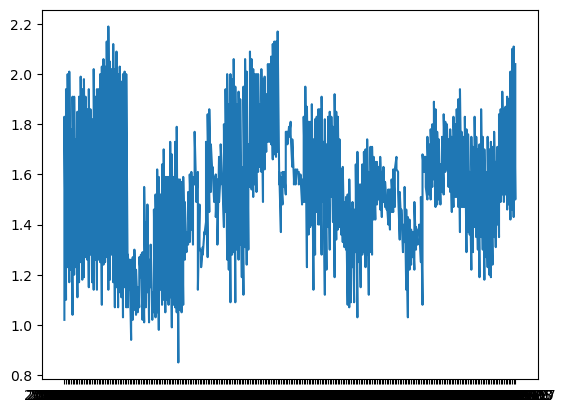

In [104]:
plt.plot(avocados_boston.date, avocados_boston.average_price)
plt.show()

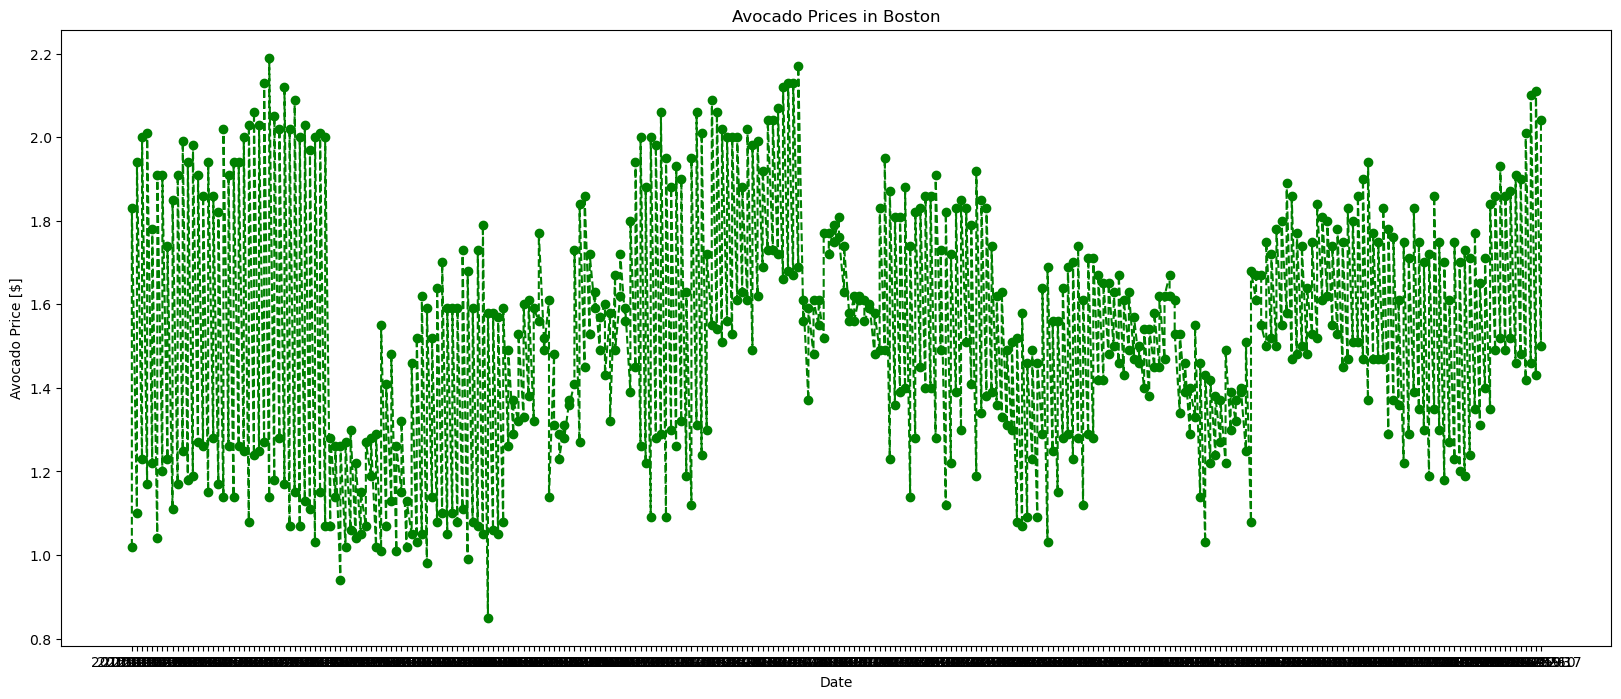

In [105]:
plt.figure(figsize = (20, 8))
plt.plot(avocados_boston.date, avocados_boston.average_price, color = 'green', linestyle = '--', marker = 'o')
plt.xlabel("Date")
plt.ylabel("Avocado Price [$]")
plt.title("Avocado Prices in Boston")
plt.show()

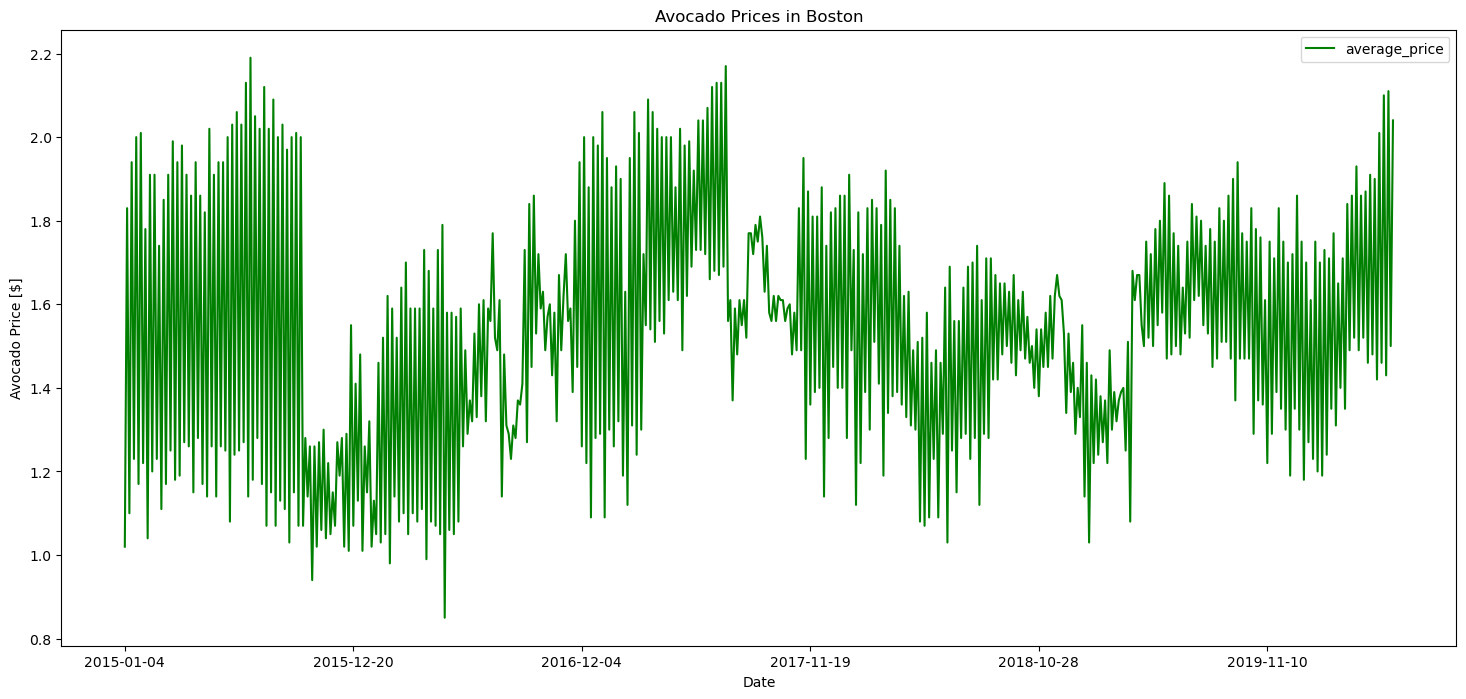

In [106]:
avocados_boston.plot(x = 'date', y = 'average_price', figsize = (18, 8), kind='line', color = 'green')
plt.xlabel("Date")
plt.ylabel("Avocado Price [$]")
plt.title("Avocado Prices in Boston")
plt.show()

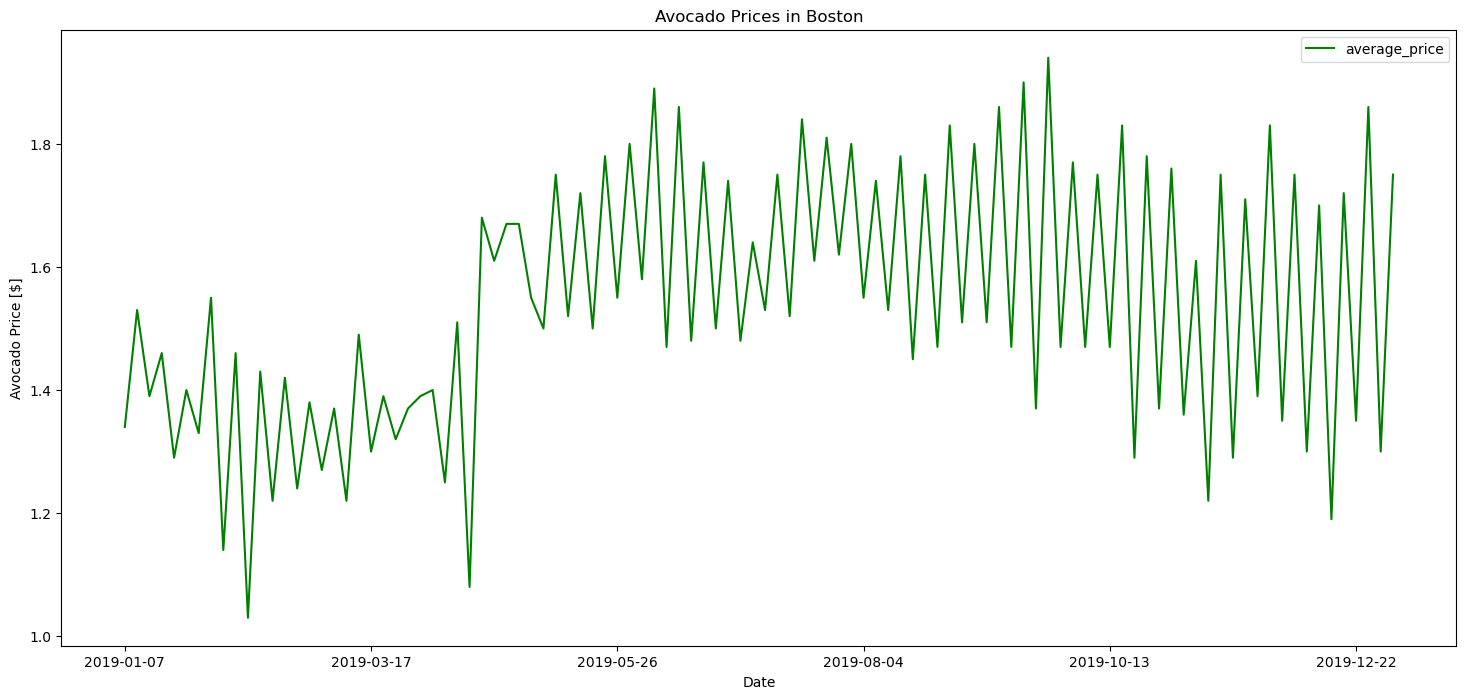

In [107]:
avocados_boston[avocados_boston.year == 2019].plot(x = 'date', y = 'average_price', figsize = (18, 8), kind='line', color = 'green')
plt.xlabel("Date")
plt.ylabel("Avocado Price [$]")
plt.title("Avocado Prices in Boston")
plt.show()

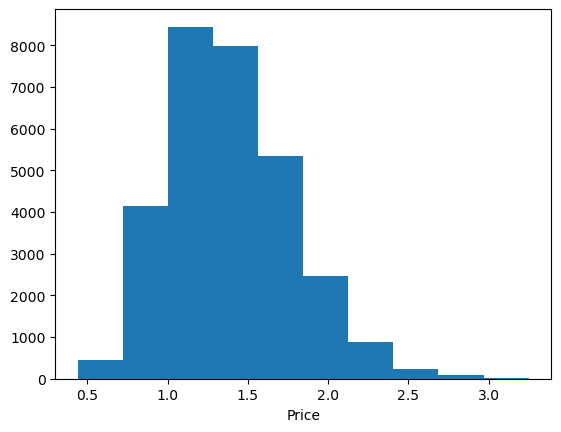

In [108]:
plt.hist(avocados.average_price)
plt.xlabel('Price')
plt.show()

<Axes: xlabel='average_price', ylabel='Count'>

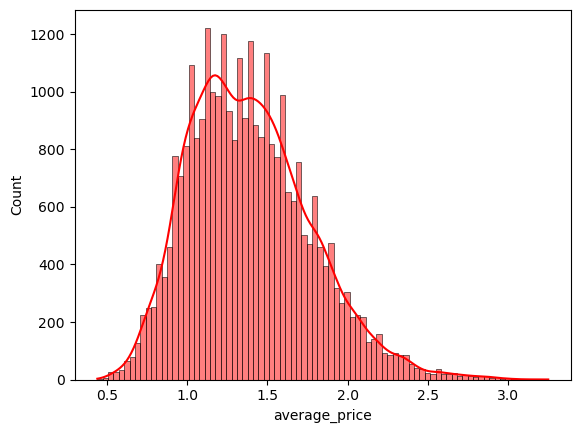

In [109]:
sns.histplot(avocados.average_price, color = 'r', kde = True)

<Axes: xlabel='average_price', ylabel='Count'>

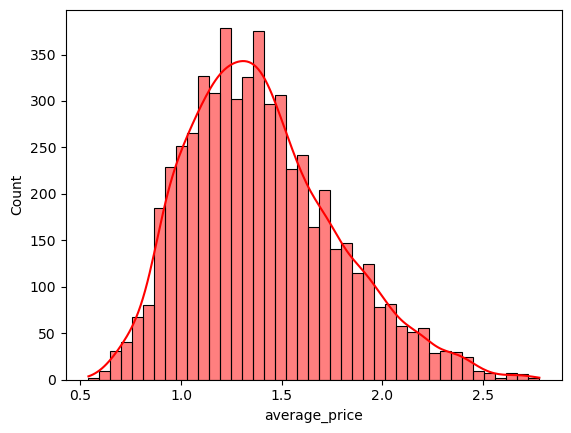

In [110]:
sns.histplot(avocados.average_price[avocados.year == 2019], color = 'r', kde = True)

<Axes: xlabel='average_price', ylabel='Count'>

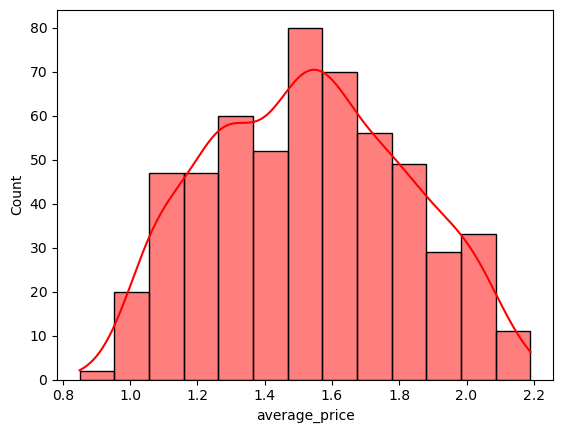

In [111]:
sns.histplot(avocados.average_price[avocados.geography == 'Boston'], color = 'r', kde = True)

---

## Combining Datasets and Long vs Wide Data

In [112]:
pop = pd.read_csv('data/population.csv')

In [113]:
pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0


In [114]:
pop.drop(labels = ['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

In [115]:
pop

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0
260,"Yemen, Rep.",YEM,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0
261,South Africa,ZAF,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
262,Zambia,ZMB,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0


In [116]:
pop_long = pop.melt(id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'Population')

In [117]:
pop_long

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996973.0
2,Angola,AGO,1960,5454933.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
15835,Kosovo,XKX,2019,1794248.0
15836,"Yemen, Rep.",YEM,2019,29161922.0
15837,South Africa,ZAF,2019,58558270.0
15838,Zambia,ZMB,2019,17861030.0


In [118]:
gdp = pd.read_csv('data/gdp.csv').drop(labels = ['Indicator Name', 'Indicator Code'], axis = 1)

In [119]:
gdp

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,9.463542e+10
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527808e+10
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.835874e+09,6.701698e+09,6.499807e+09,7.074778e+09,7.396705e+09,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.926108e+09
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.320647e+10,3.697620e+10,2.808468e+10,2.456133e+10,2.759126e+10,NaN
261,South Africa,ZAF,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,1.377739e+10,...,3.753490e+11,4.164190e+11,3.963330e+11,3.668290e+11,3.509050e+11,3.176210e+11,2.963570e+11,3.495540e+11,3.682890e+11,3.514320e+11
262,Zambia,ZMB,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,...,2.026556e+10,2.345952e+10,2.550306e+10,2.804551e+10,2.715065e+10,2.124335e+10,2.095476e+10,2.586814e+10,2.700524e+10,2.306472e+10


In [120]:
gdp_long = gdp.melt(id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

In [121]:
gdp_long

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,5.377778e+08
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN
...,...,...,...,...
15835,Kosovo,XKX,2019,7.926108e+09
15836,"Yemen, Rep.",YEM,2019,NaN
15837,South Africa,ZAF,2019,3.514320e+11
15838,Zambia,ZMB,2019,2.306472e+10


In [122]:
countries = pop_long.merge(gdp_long.drop(labels = ['Country Name'], axis = 1), 
                           on = ['Country Code', 'Year'], how = 'inner')

In [123]:
countries

,Country Name,Country Code,Year,Population,GDP
0,Aruba,ABW,1960,54211.0,NaN
1,Afghanistan,AFG,1960,8996973.0,5.377778e+08
2,Angola,AGO,1960,5454933.0,NaN
3,Albania,ALB,1960,1608800.0,NaN
4,Andorra,AND,1960,13411.0,NaN
...,...,...,...,...,...
15835,Kosovo,XKX,2019,1794248.0,7.926108e+09
15836,"Yemen, Rep.",YEM,2019,29161922.0,NaN
15837,South Africa,ZAF,2019,58558270.0,3.514320e+11
15838,Zambia,ZMB,2019,17861030.0,2.306472e+10


In [124]:
countries['GDP per capita'] = countries['GDP'] / countries['Population']

In [125]:
countries

,Country Name,Country Code,Year,Population,GDP,GDP per capita
0,Aruba,ABW,1960,54211.0,NaN,NaN
1,Afghanistan,AFG,1960,8996973.0,5.377778e+08,59.773194
2,Angola,AGO,1960,5454933.0,NaN,NaN
3,Albania,ALB,1960,1608800.0,NaN,NaN
4,Andorra,AND,1960,13411.0,NaN,NaN
...,...,...,...,...,...,...
15835,Kosovo,XKX,2019,1794248.0,7.926108e+09,4417.509940
15836,"Yemen, Rep.",YEM,2019,29161922.0,NaN,NaN
15837,South Africa,ZAF,2019,58558270.0,3.514320e+11,6001.406804
15838,Zambia,ZMB,2019,17861030.0,2.306472e+10,1291.343357


In [126]:
random_countries = np.random.choice(countries['Country Code'].unique(), 10)

In [127]:
countries_select = countries[countries['Country Code'].isin(random_countries)]

In [128]:
countries_select

,Country Name,Country Code,Year,Population,GDP,GDP per capita
0,Aruba,ABW,1960,5.421100e+04,NaN,NaN
3,Albania,ALB,1960,1.608800e+06,NaN,NaN
6,United Arab Emirates,ARE,1960,9.241800e+04,NaN,NaN
66,Euro area,EMU,1960,2.652039e+08,2.448960e+11,923.425216
67,Eritrea,ERI,1960,1.007590e+06,NaN,NaN
...,...,...,...,...,...,...
15718,Luxembourg,LUX,2019,6.198960e+05,7.110492e+10,114704.594171
15757,Other small states,OSS,2019,3.136041e+07,4.384680e+11,13981.578747
15775,Romania,ROU,2019,1.935654e+07,2.500770e+11,12919.506705
15778,South Asia,SAS,2019,1.835777e+09,3.597970e+12,1959.916976


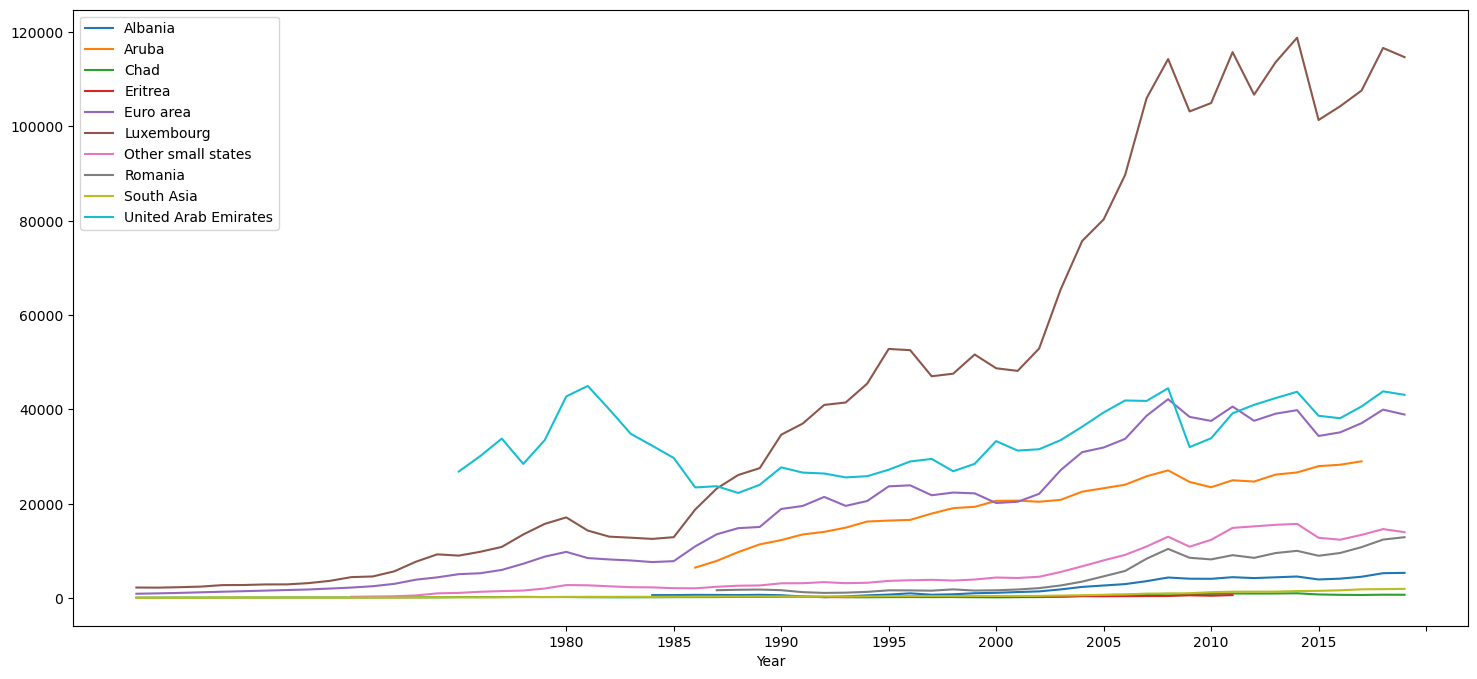

In [129]:
for name, data in countries_select.groupby('Country Name'):
    data.plot(x = 'Year', y = 'GDP per capita', label = name, figsize = (18, 8), ax = plt.gca())
plt.show()